In [49]:
import pandas as pd
import re
import numpy as np
import os
import tensorflow as tf

In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [52]:
# Read the CSV file v0.1 intg clean data.csv 
df = pd.read_csv('/content/drive/MyDrive/CAPSTONE PROJECT BANGKIT/Dataset Sentiment Analysis.csv')
df.head()

,Label,Ingredients
0,0,Algae (Seaweed) Extract
1,0,Mineral Oil
2,0,Petrolatum
3,0,Glycerin
4,0,Isohexadecane


In [53]:
# Select the first row of the DataFrame using iloc
df.iloc[0:1,]

,Label,Ingredients
0,0,Algae (Seaweed) Extract


In [54]:
# Retrieve the value in the 'Ingredients' column of the first row using iloc
df.iloc[0]['Ingredients']

'Algae (Seaweed) Extract'

In [55]:
# Select the first three rows from the first column of the DataFrame using iloc
df[df.columns[:1]].iloc[0:3]

,Label
0,0
1,0
2,0


In [56]:
# from tensorflow.keras.layers import TextVectorization
a = df['Ingredients']
b = df[df.columns[:1]].values

a


0              Algae (Seaweed) Extract
1                          Mineral Oil
2                           Petrolatum
3                             Glycerin
4                        Isohexadecane
                    ...               
709                      Succinoglycan
710        Salicornia Herbacea Extract
711    Disodium Adenosine Triphosphate
712           Sodium Hexametaphosphate
713             Octyl Methoxycinnamate
Name: Ingredients, Length: 714, dtype: object

In [57]:
df.columns

Index(['Label', 'Ingredients'], dtype='object')

In [58]:
df.dtypes

Label           int64
Ingredients    object
dtype: object

In [59]:
def proses_data(text):
    newText = text.lower() # Convert the text to lowercase
    return newText

data = df['Ingredients']
data = data.apply(lambda x: proses_data(x)) # Apply the 'proses_data' function to each element in the 'Ingredients' column using lambda
data.head()

0    algae (seaweed) extract
1                mineral oil
2                 petrolatum
3                   glycerin
4              isohexadecane
Name: Ingredients, dtype: object

In [60]:
def link_remover(text):
    url_regex = re.compile(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?')
    return url_regex.sub('', text)
data = data.apply(lambda x: link_remover(x))

# Replace special characters (non-alphanumeric and non-whitespace) with a space
def karakter_spesial(text):
    newText = re.sub('[^\w\s]', ' ', text)
    return newText
data = data.apply(lambda x: karakter_spesial(x))

# Remove excessive whitespaces
def Spasi_berlebihan(text):  
    newText = re.sub('\s+', '', text)
    newText = re.sub('^\s+', '', text)
    return newText
data = data.apply(lambda x: Spasi_berlebihan(x))


# Display the last 100 rows of the processed 'data' column
data.tail(100)

614                    faex  yeast extract 
615                hydrolyzed yeast extract
616    yeast extract faex extrait de levure
617                              isoleucine
618                               threonine
                       ...                 
709                           succinoglycan
710             salicornia herbacea extract
711         disodium adenosine triphosphate
712                sodium hexametaphosphate
713                  octyl methoxycinnamate
Name: Ingredients, Length: 100, dtype: object

In [61]:
# Maximum number of unique words to consider in the text data
MAX_WORD = 20000

# Maximum length of a sequence or sentence to be used in analysis or modeling
MAX_SEQ = 1000

In [62]:
from tensorflow.keras.layers import TextVectorization

# Create a TextVectorization layer with specified parameters
data = TextVectorization(max_tokens=MAX_WORD, output_sequence_length=1000, output_mode='int')
data

In [63]:
# Adapt the TextVectorization layer to the values of the input dataset or text data
data.adapt(a.values)
a.values

array(['Algae (Seaweed) Extract', 'Mineral Oil', 'Petrolatum', 'Glycerin',
       'Isohexadecane', 'Microcrystalline Wax', 'Lanolin Alcohol',
       'Citrus Aurantifolia (Lime) Extract',
       'Sesamum Indicum (Sesame) Seed Oil',
       'Eucalyptus Globulus (Eucalyptus) Leaf Oil',
       'Sesamum Indicum (Sesame) Seed Powder',
       'Medicago Sativa (Alfalfa) Seed Powder',
       'Helianthus Annuus (Sunflower) Seedcake', 'Sodium Gluconate',
       'Copper Gluconate', 'Calcium Gluconate', 'Magnesium Gluconate',
       'Zinc Gluconate', 'Magnesium Sulfate', '1,2-Hexanediol',
       'Acetyl Glucosamine', 'Acetyl Glutamine', 'Acetyl Heptapeptide-9',
       'Acetyl Methionine', 'Acrylates Copolymer', 'Adenosine',
       'Alchemilla Vulgaris Leaf Extract', 'Alcohol Denat',
       'Algae Extract', 'Allantoin', 'Aloe Barbadensis Flower Extract',
       'Aloe Vera', 'Alpha-Glucan Oligosaccharide',
       'Althaea Rosea Flower Extract', 'Alumina', 'Aminomethyl Propanol',
       'Ammonium Laury

In [64]:
data('Glycerin')[:2]

<tf.Tensor: shape=(2,), dtype=int64, numpy=array([166,   0])>

In [65]:
# Retrieve the vocabulary learned by the TextVectorization layer
data.get_vocabulary()

['',
 '[UNK]',
 'oil',
 'acid',
 'extract',
 'ferment',
 'sodium',
 'seed',
 'fruit',
 'butter',
 'filtrate',
 'wax',
 'stearate',
 'glycol',
 'glyceryl',
 'flower',
 'saccharomyces',
 'palm',
 'hydrolyzed',
 'root',
 'leaf',
 'gluconate',
 'zinc',
 'yeast',
 'shea',
 'isostearate',
 'glucoside',
 'copper',
 'castor',
 'sweet',
 'sorbitan',
 'rice',
 'powder',
 'potassium',
 'palmitate',
 'magnesium',
 'hydrogenated',
 'distearate',
 'disodium',
 'black',
 'alcohol',
 'acetyl',
 'water',
 'sulfate',
 'sesame',
 'sea',
 'salicylate',
 'polysorbate',
 'phosphate',
 'palmitoyl',
 'olive',
 'nut',
 'lauryl',
 'laurate',
 'jojoba',
 'hyaluronate',
 'gum',
 'galactomyces',
 'crosspolymer',
 'cocoyl',
 'coconut',
 'betaine',
 'ascorbyl',
 'tocopheryl',
 'tea',
 'sunflower',
 'sucrose',
 'succinate',
 'sesamum',
 'sativus',
 'sativa',
 'rose',
 'prunus',
 'pomegranate',
 'polyglyceryl4',
 'pine',
 'peg40',
 'pca',
 'passion',
 'methyl',
 'macadamia',
 'lysate',
 'lecithin',
 'lanolin',
 'kerne

In [66]:
vocabulary = data.get_vocabulary()
print('Vocabulary length:',len(vocabulary))

Vocabulary length: 812


In [67]:
# create txt file for vocabulary
import json
with open("./vocabulary.v0.2.json", "w") as output:
    output.write(json.dumps(data.get_vocabulary()))

In [68]:
kalimat_text = data(a.values)

In [69]:
len(a)

714

In [70]:
kalimat_text

<tf.Tensor: shape=(714, 1000), dtype=int64, numpy=
array([[101, 307,   4, ...,   0,   0,   0],
       [464,   2,   0, ...,   0,   0,   0],
       [131,   0,   0, ...,   0,   0,   0],
       ...,
       [ 38, 214, 238, ...,   0,   0,   0],
       [  6, 559,   0, ...,   0,   0,   0],
       [439, 473,   0, ...,   0,   0,   0]])>

In [71]:
dataset = tf.data.Dataset.from_tensor_slices((kalimat_text, b))
dataset = dataset.cache()
dataset = dataset.shuffle(773)
dataset = dataset.batch(20)

In [72]:
batch_a, batch_b = dataset.as_numpy_iterator().next()

In [73]:
batch_b.shape

(20, 1)

In [74]:
# Split the dataset into training, validation, and test sets based on the specified proportions
train = dataset.take(int(len(dataset)*.8)) # 80% for training
validation = dataset.skip(int(len(dataset)*.8)).take(int(len(dataset)*.9)) # 10% for validation
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))# 10% for testing

In [75]:
# Retrieve a single batch of data from the train dataset
train.as_numpy_iterator().next()

(array([[184, 158,   0, ...,   0,   0,   0],
        [528, 108,   2, ...,   0,   0,   0],
        [ 24,   9,   0, ...,   0,   0,   0],
        ...,
        [161, 206,  65, ...,   0,   0,   0],
        [218,   0,   0, ...,   0,   0,   0],
        [327,   5,   0, ...,   0,   0,   0]]),
 array([[0],
        [0],
        [1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [0],
        [0],
        [1],
        [1],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [1]]))

In [76]:
# Retrieve a single batch of data from the validation dataset
validation.as_numpy_iterator().next()

(array([[  6,  55,   0, ...,   0,   0,   0],
        [754, 550, 106, ...,   0,   0,   0],
        [145,   2,   0, ...,   0,   0,   0],
        ...,
        [182,   0,   0, ...,   0,   0,   0],
        [ 79, 141,  58, ...,   0,   0,   0],
        [ 57,   5,  10, ...,   0,   0,   0]]),
 array([[0],
        [0],
        [1],
        [1],
        [0],
        [1],
        [0],
        [0],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1],
        [0],
        [0],
        [0],
        [1],
        [0],
        [1]]))

In [77]:
# Retrieve a single batch of data from the test dataset
test.as_numpy_iterator().next()

(array([[ 40, 653,   0, ...,   0,   0,   0],
        [ 16,   5,   0, ...,   0,   0,   0],
        [396,  12,   0, ...,   0,   0,   0],
        ...,
        [ 17,  11,   0, ...,   0,   0,   0],
        [360, 666,   0, ...,   0,   0,   0],
        [369,   3,   0, ...,   0,   0,   0]]),
 array([[0],
        [1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [1],
        [0],
        [1]]))

In [78]:
b[0]

array([0])

In [79]:
from keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Embedding, LSTM, GlobalMaxPooling1D

In [80]:
#Build Model

# Define the sequential model for text classification
model = Sequential()
model.add(Embedding(MAX_WORD+1, 20))
model.add(LSTM(15, return_sequences=True))
model.add(GlobalMaxPooling1D())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, None, 20)          400020    
                                                                 
 lstm_7 (LSTM)               (None, None, 15)          2160      
                                                                 
 global_max_pooling1d_6 (Glo  (None, 15)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_16 (Dense)            (None, 32)                512       
                                                                 
 dense_17 (Dense)            (None, 1)                 33        
                                                                 
Total params: 402,725
Trainable params: 402,725
Non-trainable params: 0
________________________________________________

In [81]:
EPOCHS = 10
history = model.fit(train,validation_data=validation,epochs=EPOCHS)

Epoch 1/10
28/28 [==============================] - 17s 506ms/step - loss: 0.6922 - accuracy: 0.6000 - val_loss: 0.6883 - val_accuracy: 0.8117
Epoch 2/10
28/28 [==============================] - 14s 486ms/step - loss: 0.6800 - accuracy: 0.8589 - val_loss: 0.6658 - val_accuracy: 0.8636
Epoch 3/10
28/28 [==============================] - 15s 528ms/step - loss: 0.6338 - accuracy: 0.9018 - val_loss: 0.5776 - val_accuracy: 0.9221
Epoch 4/10
28/28 [==============================] - 14s 502ms/step - loss: 0.4830 - accuracy: 0.9054 - val_loss: 0.3227 - val_accuracy: 0.9221
Epoch 5/10
28/28 [==============================] - 14s 518ms/step - loss: 0.2759 - accuracy: 0.8875 - val_loss: 0.2137 - val_accuracy: 0.9091
Epoch 6/10
28/28 [==============================] - 15s 549ms/step - loss: 0.3563 - accuracy: 0.8786 - val_loss: 0.2335 - val_accuracy: 0.8961
Epoch 7/10
28/28 [==============================] - 14s 482ms/step - loss: 0.2237 - accuracy: 0.9000 - val_loss: 0.1798 - val_accuracy: 0.9221

In [82]:
history.history

{'loss': [0.692188560962677,
  0.6800413727760315,
  0.6337790489196777,
  0.4829830825328827,
  0.27594009041786194,
  0.35628557205200195,
  0.22366243600845337,
  0.12463784962892532,
  0.08636261522769928,
  0.053760673850774765],
 'accuracy': [0.6000000238418579,
  0.8589285612106323,
  0.9017857313156128,
  0.9053571224212646,
  0.887499988079071,
  0.8785714507102966,
  0.8999999761581421,
  0.9607142806053162,
  0.9732142686843872,
  0.987500011920929],
 'val_loss': [0.6883077025413513,
  0.6657879948616028,
  0.5776048302650452,
  0.3227178156375885,
  0.21365498006343842,
  0.23351429402828217,
  0.1797923743724823,
  0.10427144169807434,
  0.05770116671919823,
  0.03191433846950531],
 'val_accuracy': [0.8116883039474487,
  0.8636363744735718,
  0.9220778942108154,
  0.9220778942108154,
  0.9090909361839294,
  0.8961039185523987,
  0.9220778942108154,
  0.9610389471054077,
  0.9870129823684692,
  0.9935064911842346]}

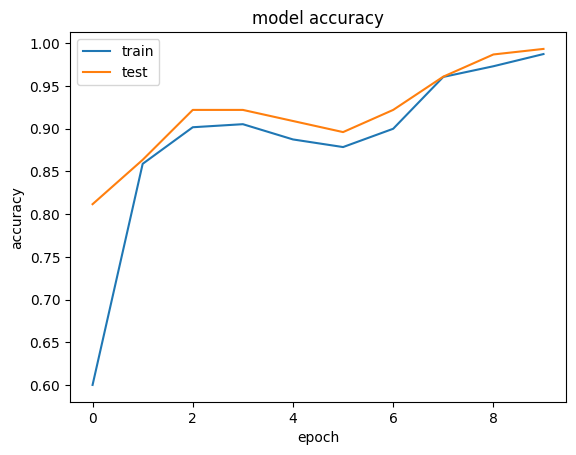

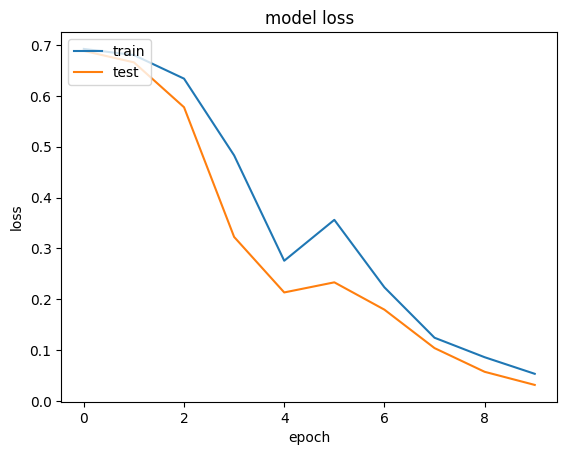

In [83]:
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [84]:
batch_c = test.as_numpy_iterator().next()

In [97]:
masukan_text = data('Water (Eau), Propanedoil, PPG-3, Isostearyl Methyl Ether, Niacinamide, Glyceryl Polyacrylate, Phenoxyethanol, Ammonium Acryloyldimethyltaurate/VP Copoylymer, Ammonium Acryloyldimethyltaurate/Beheneth-25 Methacrylate Crosspolymer, Acrylates/C10-30 Alkyl Acrylate Crosspolymer, Caprylyl Glycol, Cellulose Gum, Tromethamine, Tocopheryl Acetate, Fragrance (Parfum), Citrullus Lanatus (Watermelon) Fruit Extract, Sodium Hyaluronate, Cyanocobalamin, Benzyl Alcohol, Hexyl Cinnamal, Limonene, Linalool')

In [98]:
model.predict(np.expand_dims(masukan_text,0))

1/1 [==============================] - 0s 239ms/step


array([[0.00036381]], dtype=float32)

In [99]:
model.save('funne_sentiment_analysis.v.03')

In [101]:
model.save('funne_sentiment_analysis.v.03.h5')   

In [103]:
import csv

data = []
with open('/content/Dataset Sentiment Analysis.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, skipinitialspace=True)
    data.append(tuple(next(reader)))
    for num, val in reader:
        data.append((int(num), val))

print(data)


[('Label', 'Ingredients'), (0, 'Algae (Seaweed) Extract'), (0, 'Mineral Oil'), (0, 'Petrolatum'), (0, 'Glycerin'), (0, 'Isohexadecane'), (0, 'Microcrystalline Wax'), (0, 'Lanolin Alcohol'), (0, 'Citrus Aurantifolia (Lime) Extract'), (1, 'Sesamum Indicum (Sesame) Seed Oil'), (0, 'Eucalyptus Globulus (Eucalyptus) Leaf Oil'), (0, 'Sesamum Indicum (Sesame) Seed Powder'), (0, 'Medicago Sativa (Alfalfa) Seed Powder'), (0, 'Helianthus Annuus (Sunflower) Seedcake'), (0, 'Sodium Gluconate'), (0, 'Copper Gluconate'), (0, 'Calcium Gluconate'), (0, 'Magnesium Gluconate'), (0, 'Zinc Gluconate'), (0, 'Magnesium Sulfate'), (0, '1,2-Hexanediol'), (0, 'Acetyl Glucosamine'), (0, 'Acetyl Glutamine'), (0, 'Acetyl Heptapeptide-9'), (0, 'Acetyl Methionine'), (0, 'Acrylates Copolymer'), (0, 'Adenosine'), (0, 'Alchemilla Vulgaris Leaf Extract'), (0, 'Alcohol Denat'), (0, 'Algae Extract'), (0, 'Allantoin'), (0, 'Aloe Barbadensis Flower Extract'), (0, 'Aloe Vera'), (0, 'Alpha-Glucan Oligosaccharide'), (0, 'Alth

In [104]:
import json
with open("./data.json", "w") as output:
    output.write(json.dumps(data))